In [1]:
lattice_data = {
    'Ti': {'structure': 'hcp', 'a': 2.95, 'c': 4.68},
    'Cr': {'structure': 'bcc', 'a': 2.88},
    'Ni': {'structure': 'fcc', 'a': 3.52},
    'Zr': {'structure': 'hcp', 'a': 3.23, 'c': 5.15},
    'Mo': {'structure': 'bcc', 'a': 3.15},
    'Pb': {'structure': 'fcc', 'a': 4.95},
    'Hf': {'structure': 'hcp', 'a': 3.19, 'c': 5.05},
    'W':  {'structure': 'bcc', 'a': 3.16},
    'Pt': {'structure': 'fcc', 'a': 3.92}
}

In [2]:
from ase.build import bulk
from flapw_python.flapw_calculator import FlapwCalculator

lapwin_format = './infiles/lapwinNOSPIN'
lapwout = './lapwoutSCF'
command='./flapw_python/run_flapw.sh'

In [16]:
# # Select element fcc/bcc
# symbol = 'Cr'
# data = lattice_data[symbol]
# crystal = data['structure']
# a = data['a']

# Select element hcp
symbol = 'Ti'
data = lattice_data[symbol]
crystal = data['structure']
a = data['a']
c = data['c']

dyld[67308]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[67308]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[67308]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.


Read Results


dyld[67830]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[67830]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[67830]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.


Read Results


dyld[68219]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[68219]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[68219]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.


Read Results


dyld[68691]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[68691]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[68691]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.


Read Results
HCP optimized c (a=2.940659214869611 fixed): c = 4.6677 Å, energy = -46468.213311 eV


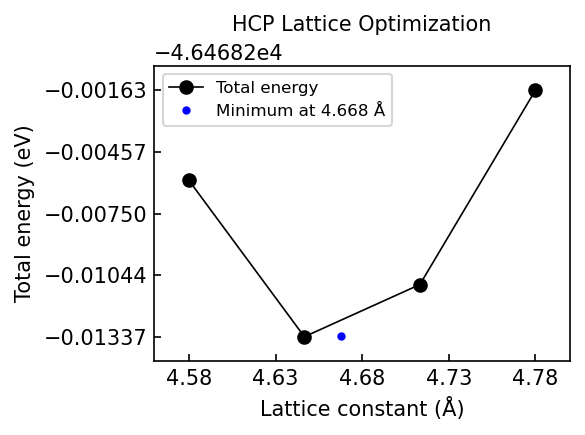

In [ ]:
from flapw_python import optimize_lattice as opt

# # Optimize fcc/bcc
# a_opt, e_opt, a_list, energies = opt.optimize_lattice(
#     symbol, 
#     crystal, 
#     a0=a, 
#     da=0.1, 
#     n=4,
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     command=command)

# opt.plot_optimization_result(crystal, 
#                              a_or_c_list=a_list, 
#                              energies=energies, 
#                              a_opt=a_opt, 
#                              e_opt=e_opt, 
#                              figsize=(4,3),
#                              output_file=f'./attachments/fig_latt_opt_{symbol}.png')

# # Optimize hcp, a_only
# a_opt, c0, e_opt, a_list, energies = opt.optimize_lattice(
#     symbol, 
#     crystal, 
#     a0=a,
#     c0=c, 
#     da=0.1, 
#     n=4,
#     hcp_mode='a_only',
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     command=command)

# opt.plot_optimization_result(crystal, 
#                              a_or_c_list=a_list, 
#                              energies=energies, 
#                              a_opt=a_opt, 
#                              e_opt=e_opt, 
#                              figsize=(4,3),
#                              output_file=f'./attachments/fig_latt_opt_{symbol}_aOnly.png')

# Optimize hcp, c_only
# a0, c_opt, e_opt, c_list, energies = opt.optimize_lattice(
#     symbol, 
#     crystal, 
#     a0=a_opt,
#     c0=c, 
#     da=0.05, 
#     n=4,
#     hcp_mode='c_only',
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     command=command)

# opt.plot_optimization_result(crystal, 
#                              a_or_c_list=c_list, 
#                              energies=energies, 
#                              a_opt=c_opt, 
#                              e_opt=e_opt, 
#                              figsize=(4,3),
#                              output_file=f'./attachments/fig_latt_opt_{symbol}_cOnly.png')

In [19]:
# # Calculate DOS bcc/fcc

# command_dos = './flapw_python/run_flapw_dos.sh'

# atoms = bulk(symbol,crystalstructure=crystal,a=a_opt)
# atoms.calc = FlapwCalculator(lapwin_format=lapwin_format,lapwout=lapwout,a=a_opt, command=command_dos)

# energy = atoms.get_potential_energy()
# print(energy)

# Calculate DOS hcp

command_dos = './flapw_python/run_flapw_dos.sh'

atoms = bulk(symbol,crystalstructure=crystal,a=a_opt, c=c_opt)
atoms.calc = FlapwCalculator(lapwin_format=lapwin_format,lapwout=lapwout,a=a_opt, command=command_dos)

energy = atoms.get_potential_energy()
print(energy)

dyld[69611]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[69611]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[69611]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.
dyld[70257]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/

Read Results
-46468.20857797941


xmin = 0.0 xmax = 2.625465
ymin = -10.0 ymax = 10.0


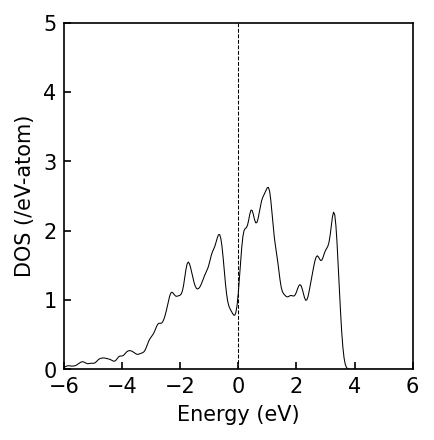

In [20]:
from flapw_python import dos_plotter
output_file = './attachments/'

# # Call the plotting function, fcc/bcc
# dos_plotter.plot_dos(
#     file_path='DOS/dos.xy', 
#     number_of_atoms=len(atoms), 
#     figsize=(3,3),
#     output_file=output_file+f'fig_dos_{symbol}_a{a_opt:.3f}.png', # fcc/bcc
#     )

# Call the plotting function, hcp
dos_plotter.plot_dos(
    file_path='DOS/dos.xy', 
    number_of_atoms=len(atoms), 
    figsize=(3,3),
    output_file=output_file+f'fig_dos_{symbol}_a{a_opt:.3f}_c{c_opt:.3f}.png', # fcc/bcc
    )